<a href="https://colab.research.google.com/github/DaegyuHwang/David_study/blob/main/smailing_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
###웃는 얼굴 사진을 구분하는 분류 모델을 CNN으로 학습함

from google.colab import drive
drive.mount('/content/drive/')

#from google.colab import files # 데이터 불러오기
#file_uploaded=files.upload()

Mounted at /content/drive/


In [59]:
## 폴더 이동에 관련된 간단한 명령어이며, 같은 창안에서 주석을 사용하지 못합니다.

## pwd 는 현재 폴더 확인
## cd 폴더 이름: 폴더(directroy)로 옮기기
## cd .. 현재 있는 폴더에서 현재 폴더를 포함하는 더 큰 폴더로 이동합니다.
## cd / 아예 가장 큰 폴더 (root directory)로 이동합니다.


In [10]:
cd /content/drive/MyDrive/2023deeplearning/

/content/drive/MyDrive/2023deeplearning


In [11]:
ls

'Assignment for 11.01 .ipynb'   data/                     'smailing or not.ipynb'  '유튜브 과제'
'assignment for 11.18.ipynb'   'K-fold assignment.ipynb'   test/
 CNN                            pandas_assignment          Untitled


In [12]:
pwd

'/content/drive/MyDrive/2023deeplearning'

Text(0.5, 1.0, 'SMILE')

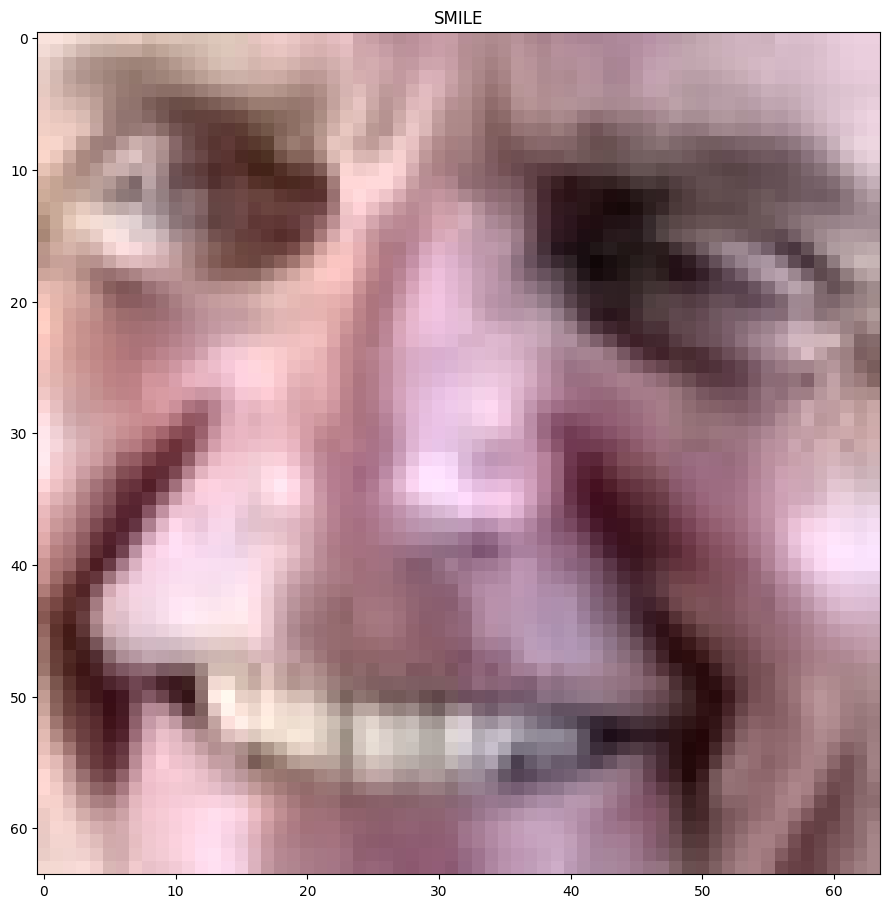

In [63]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

### smile 폴더 안에 웃는 그림을 확인해 봅니다.

image_sample= imread('data/smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('SMILE')
#ax.axis('off');

Text(0.5, 1.0, 'NON_smile')

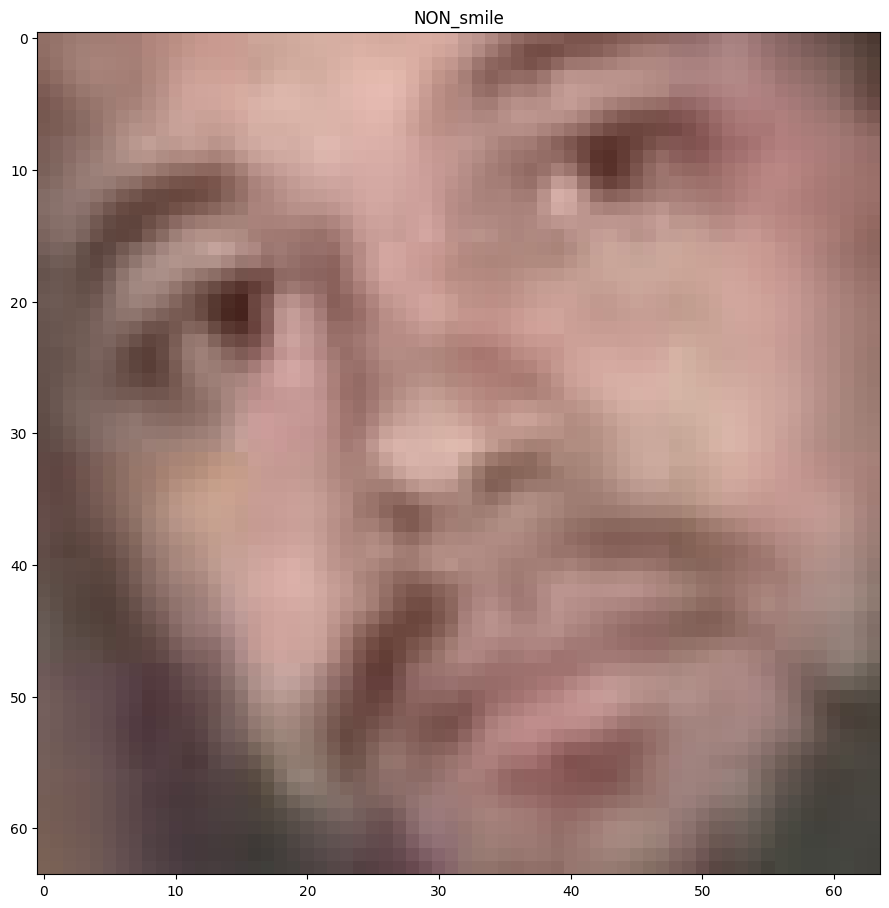

In [64]:
###   폴더 안에 웃지 않는 그림을 확인해 봅니다.

image_sample2= imread('data/non_smile/Aaron_Patterson_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('NON_smile')

In [ ]:

### 그림의 모양을 확인해 보았습니다.
### 320x320 사이즈의 color 사진입니다.

image_sample2.shape

### 그냥 root directory(맨땅)에서 시작하고자 합니다. 그래서 cd /

(64, 64, 3)

In [2]:
pwd

'/content'

In [13]:
# ImageDataGenerator의 flow_from_directory를 사용하여 directory로 데이터를 입력

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

### ImageDataGenerator는 픽셀의 컬러 혹은 흑백값을 0에서 255를 0과 1사이로 바꾸어 줍니다. 이것은 필수입니다.
### ImageDataGenerator는 여러가지 옵션으로 사진의 갯수를 늘릴 수 있습니다.


### 아래는 train data에게 적용되는 옵션입니다.

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )


### 이제 /content/drive/MyDrive/data/train에 두개의 폴더 adults/  children/에서 train data로 쓸 그림을 가지고 옵니다.
### 그리고 각각 폴더에서 온 것을 [1,0]과 [0,1]를 정답으로 해서 불러옵니다.

train = train_gen.flow_from_directory(directory='data',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize, 사이즈를 원하는 모양으로 조절이 가능해요.
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=40,
                                              shuffle=True)


#### 아래는 validation_data에 사용할 data를 쓰는 것이라서 오직 크기를 변경하는 것만 하고, 다른 선택사항은 사용하지 않습니다.

valid_gen = ImageDataGenerator(
        rescale=1./255
    )


test = valid_gen.flow_from_directory(directory='test',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=40,
                                              shuffle=True)


# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
### [1,0]과 [0,1]이므로 위와 같이 했습니다.
### 만약 위에서 class_mode='binary'설정했다면, Dense(1,activation='sigmoid' )가 되여야 하고, 아래 compile을 loss=' binary_crossentropy'해야 합니다.

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, validation_data = test, epochs=5 )


Found 1203 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


<ipython-input-13-780d622e5d6f>:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, validation_data = test, epochs=5 )


Epoch 1/5
31/31 [==============================] - 494s 16s/step - loss: 3.4765 - accuracy: 0.4996
Epoch 2/5
31/31 [==============================] - 13s 433ms/step - loss: 0.6955 - accuracy: 0.5104
Epoch 3/5
31/31 [==============================] - 13s 416ms/step - loss: 0.6914 - accuracy: 0.5436
Epoch 4/5
31/31 [==============================] - 11s 364ms/step - loss: 0.6937 - accuracy: 0.5478
Epoch 5/5
31/31 [==============================] - 13s 399ms/step - loss: 0.6932 - accuracy: 0.5062
